# Árboles de peso mínimo: algoritmos de Prim y Kruskal

## Introducción

Un árbol ayuda a conectar los vértices de una gráfica. En el caso no dirigido cualquier árbol tiene una cantidad fija de aristas. Pero si asignamos pesos a las aristas, podemos comparar árboles entre sí. En este capítulo estudiamos el problema de encontrar un árbol de peso mínimo. Discutimos de manera teórica y práctica los algoritmos de Prim y de Kruskal.


## Árboles de peso mínimo

Para cualquier gráfica $G$ conexa en $n$ vértices podemos encontrar como subgráfica a un árbol que use todos los vértices. Esta es una manera "económica" de conectar a todos los vértices de la gráfica pues usa únicamente $n-1$ aristas. De hecho, es la menor cantidad de aristas que se pueden usar y entonces en términos de números de aristas cualquier árbol serviría.

Sin embargo, en los problemas de aplicación es posible que el "uso" de una arista sea más costoso que el de otra. Pensemos por ejemplo en la siguiente gráfica con aristas ponderadas.

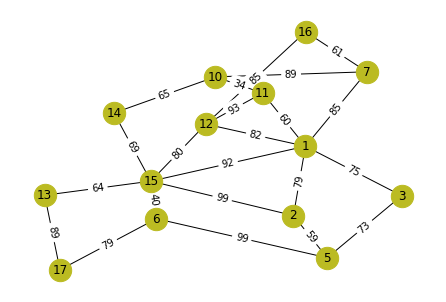

In [24]:
G=nx.Graph()
G.add_weighted_edges_from([
    (1, 7, 85), (7, 16, 61), (12, 16, 68), (10, 11, 34),
    (14, 10, 65), (6, 5, 99), (15, 13, 64), (1, 11, 60), 
    (16, 12, 85), (11, 12, 93), (1, 2, 79), (1, 15, 92),
    (17, 13, 89), (15, 6, 40), (15, 2, 99), (1, 3, 75),
    (15, 14, 69), (6, 17, 79), (2, 5, 59),  (1, 12, 82),
    (7, 10, 89), (5, 3, 73), (15, 12, 80)
    ])

labels = nx.get_edge_attributes(G,'weight')
nx.draw_kamada_kawai(G,with_labels=True, node_color='#bbbb22',node_size=500)
nx.draw_networkx_edge_labels(G,KKL,edge_labels=labels)

plt.show()

Los vértices pueden representar casas y las aristas potenciales lugares donde se pueden colocar cables eléctricos. El peso en cada arista puede representar lo que costaría colocar un cable ahí. Nos gustaría que la red eléctrica quede toda conexa, pero gastando lo menos posible en cables.

Aplicaciones como la anterior ayudan a motivar la siguiente definición.

**Definición.** El **peso** de un árbol $T$ que es subgráfica de una gráfica ponderada $G$ es la suma de los pesos de las aristas de $T$.

A partir de aquí podemos plantear el siguiente problema.

**Problema.** Dada una gráfica conexa con aristas ponderadas $G$, encontrar un árbol que use todos los vértices y que sea de peso mínimo.

## Algoritmo de Prim

El algoritmo de Prim es un algoritmo voraz. Por esa razón es muy sencillo describir su idea general. A grandes rasgos, lo que hace es paso a paso elegir la mejor arista (la de peso mínimo) que una a un vértice del árbol en construcción, con uno que aún no esté en el árbol. Ya elegida, añade esa y el vértice al árbol en construcción. Se puede iniciar el algoritmo en cualquier vértice.

La descripción en pseudocódigo sería la siguiente:

```
def prim(G):
    v0=algun vértice de T
    T=[v0]
    A=V(G)\{v0}
    aristas_buenas=[]
    mientras A no sea vacío:
        elegir la arista uv de menor peso con u en T y v en A
        agregar uv a aristas_buenas
        pasar v de A a T
    regresar aristas_buenas
```

La idea es bastante sencilla debido a su heurística voraz. Sin embargo, como hemos discutido, es muy importante verificar la correctitud de estos algoritmos sobre todo cuando usan esta heurística.

**Teorema.** El algoritmo de Prim encuentra correctamente un árbol de peso mínimo de una gráfica ponderada $G$.

*Demostración.* Pensemos que la gráfica $G$ tiene $n$ vértices. Lo primero que notamos es que en cada iteración del ciclo se pasa un vértice de $A$ a $T$, de modo que hay $n-1$ iteraciones. Como la gráfica es conexa, siempre hay por lo menos una arista de $A$ a $T$, así que hay una de peso mínimo. Así, `aristas_buenas` al final tiene $n-1$ aristas. Finalmente, observamos que las gráficas de `aristas_buenas` son suficientes para conectar todos los vértices de $G$ pues en cada paso conectan a un nuevo vértice a la componente conexa del árbol en construcción. Así, al final `aristas_buenas` inducen una subgráfica conexa y con $n-1$ aristas, lo cual sabemos que debe ser un árbol.

Afirmamos que este es un árbol de peso mínimo. Con el fin de encontrar una contradicción, supongamos que no, y que la mejor elección de aristas es un conjunto $T'$ con menor peso que $T$. Veremos que podemos construir un árbol $T''$ con peso todavía menor al de $T'$, lo cual sería una contradicción por principio extremo.

Como $T$ y $T'$ difieren, hay un primer paso en el algoritmo para el cual elegimos una arista $e$ para $T$, pero que no está en $T'$. Al quitar $e$ de $T$, queda dividida en dos componentes conexas $R$ y $S$. Como $T'$ es árbol, debe haber una arista $e'$ en $T'$ que conecte a $R$ con $S$. Como $R$ es lo que llevamos construido del árbol $T$ hasta antes de poner $e$, tenemos que el peso de $e$ es menor al de $e'$.

Consideremos $T''$ el conjunto de aristas obtenido de quitarle $e'$ a $T'$ y poner $e$. Estas aristas conectan la gráfica, pues con $T'$ tanto $R$ como $S$ quedaban conexas, y $e$ las conecta. Además, son $n-1$. De este modo $T''$ son las aristas de un árbol de $G$. Además, su peso es menor que el de $T'$ pues el peso de $e$ es menor que el de $e'$.

Hemos llegado a un absurdo: a partir de la existencia de un mejor árbol que $T$, hemos encontrado un árbol $T''$ mejor que el mejor árbol $T'$. De esta manera, no hay un árbol con menor peso que el de $T$.
<span class="math" style="float:right">$\square$</span>



## Implementación del algoritmo de Prim

La idea del algoritmo de Prim es sencilla, pero puede ser implementada de distintas maneras que llevan a distintas complejidades en tiempo. Pensemos que $G$ tiene $n$ vértices y $m$ aristas. Si en cada iteración del ciclo estudiamos a todas las aristas de $T$ a $A$, podemos potencialmente necesitar $O(m)$ pasos para encontrar cuál de ellas es la mejor. De esta manera tomaríamos en total $O(nm)$ pasos.

Una mejor idea es recordar para cada arista de $A$ cuál es la mejor arista hacia $T$. Al pasar un vértice $u$ de $T$ a $A$ hay que actualizar esta información de ser necesario, pues puede que ahora la mejor arista sea hacia $u$. Esta actualización toma tiempo $O(n)$. Con esta información, la mejor arista de $T$ a $A$ será la mejor de estas aristas mejores. Encontrar el mínimo tomará sólo tiempo $O(n)$ entonces. De esta manera, con esta mejor bajamos el tiempo de ejecución a $O(n^2)$.

El código a continuación es una posible implementación que usa esta última idea.

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

def prim(G):
    masinf=float('inf')
    A={v:(None,masinf) for v in G.nodes}
    v0=list(A.keys())[0]
    del(A[v0])

    aristas_buenas=[]

    for v in G.neighbors(v0):
       A[v]=(v0,G[v][v0]['weight'])

    while A:
        # Encontrar la mejor arista de T a A y agregarla al árbol.
        # Debe de ser de entre las mejores para cada vértice.
        mejor_peso=masinf
        for v in A.keys():
            if A[v][1]<mejor_peso:
                mejor=v
                mejor_peso=A[v][1]
        aristas_buenas.append((mejor,A[mejor][0],A[mejor][1]))
        del(A[mejor])

        # Actualizar las mejores para cada vértice, si es necesario.
        for v in G.neighbors(mejor):
            if v in A.keys():
                if A[v][1]>G[v][mejor]['weight']:
                    A[v]=(mejor,G[v][mejor]['weight'])
    return aristas_buenas


Para finalizar con la discusión del algoritmo de Prim, ejecutémoslo en la instancia que dimos previamente y dibujemos el resultado.

[]

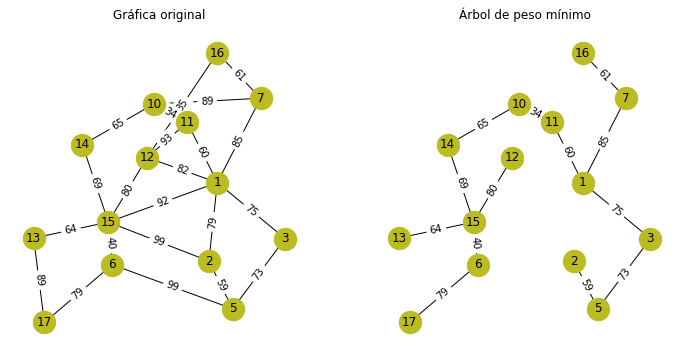

In [25]:
H=nx.Graph()
H.add_weighted_edges_from(prim(G))

KKL=nx.kamada_kawai_layout(G)

fig, ax= plt.subplots(1,2)
fig.set_size_inches(12,6)

ax[0].set_title('Gráfica original')
nx.draw_kamada_kawai(G,ax=ax[0],with_labels=True, node_color='#bbbb22',node_size=500)
nx.draw_networkx_edge_labels(G,KKL,ax=ax[0],edge_labels=labels)

labels2 = nx.get_edge_attributes(H,'weight')
ax[1].set_title('Árbol de peso mínimo')
nx.draw(H,pos=KKL,ax=ax[1],with_labels=True, node_color='#bbbb22',node_size=500)
nx.draw_networkx_edge_labels(H,KKL,ax=ax[1],edge_labels=labels2)

plt.plot()

## Algoritmo de Kruskal

El algoritmo de Kruskal también es un algoritmo voraz, pero procede de una forma muy distinta. Lo que hace es comenzar ordenando las aristas de menor a mayor de acuerdo a su peso. Luego, va agregando aristas en orden, procurando que no se hagan ciclos. El algoritmo termina una vez que se hayan agregado $n-1$ aristas.


```
def kruskal(G):
    L=aristas de G
    ordenar L por peso
    T=[]
    para cada arista e en L:
        si podemos agregar e a T sin formar ciclos:
            lo hacemos y aumentamos k en 1
        si T tiene n-1 aristas:
            regresamos T
```

Es sorprendente que una idea tan sencilla funciona.  A diferencia del algoritmo de Prim, en el algoritmo de Kruskal no tiene la garantía de en cada paso tener una construcción parcial que sea conexa. Sin embargo, también es fácil ver que siempre se llega a un árbol, pues una gráfica con $n-1$ aristas y sin ciclos debe de ser un árbol. La demostración de la optimalidad requiere de un argumento más delicado, parecido al del algoritmo de Prim. Los detalles quedan como tarea moral.

Seguir el pseudocódigo al pie de la letra nos da casi una implementación en código. Sin embargo, tiene la desventaja de que no es obvio cómo verificar si la arista e crea o no crea ciclos. Una opción sería hacer esto mediante una búsqueda por profundidad, que toma tiempo $O(m+n)$. Si hacemos esto, en total tendríamos potencialmente $O(m\log m+m(m+n))$ pasos, lo cual es demasiado.

Este tiempo de ejecución se puede mejorar notablemente agregando una idea: el uso de la estructura de datos `Union-Find`. Muy a grandes rasgos, esta estructura permite en tiempo $O(\log n)$ hacer cualquiera de las siguientes operaciones: 1) Decir si dos vértices están en una misma componente conexa, 2) Agregar un nuevo vértice a una componente conexa y 3) Unir componentes conexas.

En total, esta mejora reduce el tiempo de ejecución a $O(m\log m+mn\log n)$, que usualmente es $O(m\log m)$. Si se tienen $O(n)$ aristas, esto es $O(n\log n)$, que es más rápido que el algoritmo de Prim.

## Tarea moral

Los siguientes problemas te ayudarán a practicar lo visto en esta entrada. Para resolverlos, necesitarás usar herramientas matemáticas, computacionales o ambas.

1. Aplica manualmente el algoritmo de Kruskal en la gráfica que usamos como ejemplo.
2. Adapta el algoritmo de Prim y el de Kruskal para que encuentren un bosque de peso mínimo cuando la gráfica ponderada $G$ no necesariamente es conexa. Justifica la correctitud.
3. ¿Es cierto que el árbol de peso mínimo de una gráfica con aristas ponderadas $G$ es único? ¿Será único si los pesos en todas las aristas son distintos entre sí?
4. Demuestra la correctitud del algoritmo de Kruskal y realiza una implementación básica del algoritmo de Kruskal en Python.
5. Lee acerca de la estructura de datos `Union-Find`, por ejemplo, <a href="https://en.wikipedia.org/wiki/Disjoint-set_data_structure"> en Wikipedia</a>. Incorpora las ideas a tu implementación de Kruskal para volvela más eficiente.